In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("../assets/claims.xlsx")

In [3]:
df.head()

,ARN,Received date,Last received date,Visit date,Diagnosis code,CPT code,Claim No,Policy No,Plan code,Benefit level,Claim status,Provider name,Doctor name,Ward level,Incurred amount,Paid amount,Rejected amount,Rejected reason code,Reject remark,Year
0,QH120000694,2013-01-01 21:03:00.0,2013-01-01 21:03:00.0,2012-12-29 00:00:00.0,388.30a,99201,9Z90634,CTM0012382,CN6B,GP consultation,COMPLETED,GU MICHELLE M M,GU MICHELLE M M,NaN,150.0,0.0,0.0,NaN,NaN,2013
1,QH120000696,2013-01-02 00:00:00.0,2013-01-02 00:00:00.0,2012-11-23 00:00:00.0,465.9a,99201,C12-00084B,CTM0016582,CN6B,GP consultation,COMPLETED,NON-NETWORK PROVIDER,DR. WU PATRICK,NaN,210.0,0.0,42.0,64,Exceed benefit limit,2013
2,QH120000697,2013-01-02 00:00:00.0,2013-01-02 00:00:00.0,2012-12-13 00:00:00.0,465.9a,99201,C12-00084C,CTM0016582,CN6B,GP consultation,COMPLETED,NON-NETWORK PROVIDER,DR. WU PATRICK,NaN,240.0,0.0,60.0,64,Exceed benefit limit,2013
3,QH120000698,2013-01-02 00:00:00.0,2013-01-02 00:00:00.0,2012-12-24 00:00:00.0,465.9a,99201,C12-00084D,CTM0016582,CN6B,GP consultation,COMPLETED,NON-NETWORK PROVIDER,DR. LAM KWAN YIN,NaN,160.0,0.0,32.0,64,Exceed benefit limit,2013
4,QH120000699,2013-01-02 00:00:00.0,2013-01-02 00:00:00.0,2012-12-27 00:00:00.0,465.9a,99201,C12-00084E,CTM0016582,CN6B,GP consultation,COMPLETED,NON-NETWORK PROVIDER,DR. LAM KWAN YIN,NaN,160.0,0.0,32.0,64,Exceed benefit limit,2013


In [4]:
df.dtypes

ARN                      object
Received date            object
Last received date       object
Visit date               object
Diagnosis code           object
CPT code                 object
Claim No                 object
Policy No                object
Plan code                object
Benefit level            object
Claim status             object
Provider name            object
Doctor name              object
Ward level               object
Incurred amount         float64
Paid amount             float64
Rejected amount         float64
Rejected reason code     object
Reject remark            object
Year                      int64
dtype: object

In [5]:
df["Rejected reason code"].value_counts().head(10)

64    4956
68    2267
71    1867
1      658
22     446
99     429
39     405
65     187
59     156
14     100
Name: Rejected reason code, dtype: int64

In [6]:
df["Plan code"].value_counts()

CN4A    8270
CN8B    8124
CN6B    4918
CND7    2879
CND8    2687
CN3B    1985
CN2B     986
CN2A     979
IME7     696
CND9     678
CN5B     543
CND4     497
CN4B     388
IME9     351
IME8     338
CNBJ     282
CNBI     249
IME4     178
CND2     127
CND5      98
IME5      69
IME2      64
CND6      58
IME3      49
CN1B      46
CND3      30
CN5A      20
CN3A      17
CND1      10
IME1       8
CNDA       7
IME6       2
Name: Plan code, dtype: int64

In [7]:
df.groupby("Plan code")["Paid amount"].mean().sort_values(ascending = False).head(20)

Plan code
IME5    18770.411594
IME9     4208.880342
IME8     3288.100592
CNBJ     2094.105674
CND9     1887.497050
CND8     1577.646446
IME7     1399.182759
CN5B     1360.928177
CN8B     1126.500579
CN6B     1089.354982
CN3B     1057.853098
CND2     1044.661417
CN1B      951.295652
CND7      710.345120
CN2B      642.427992
CNBI      591.196787
CND4      447.593561
CN4B      396.775773
CN4A      231.437001
CN2A      183.812053
Name: Paid amount, dtype: float64

In [8]:
df[df["Paid amount"] <> 0.00].head()

,ARN,Received date,Last received date,Visit date,Diagnosis code,CPT code,Claim No,Policy No,Plan code,Benefit level,Claim status,Provider name,Doctor name,Ward level,Incurred amount,Paid amount,Rejected amount,Rejected reason code,Reject remark,Year
36,QH120000708,2013-01-08 00:00:00.0,2013-01-08 00:00:00.0,2012-12-22 00:00:00.0,455.6a,45378,C13-00004A,CTM0016760,CN8B,Surgeon's fee,COMPLETED,HK ADVENTIST HOST-TSUEN WAN,HK ADVENTIST HOST-TSUEN WAN,General,4500.0,4500.0,0.0,NaN,NaN,2013
37,QH120000708,2013-01-08 00:00:00.0,2013-01-08 00:00:00.0,2012-12-22 00:00:00.0,569.89c,45378,C13-00004A,CTM0016760,CN8B,Surgeon's fee,COMPLETED,HK ADVENTIST HOST-TSUEN WAN,HK ADVENTIST HOST-TSUEN WAN,General,4500.0,4500.0,0.0,NaN,NaN,2013
38,QH120000708,2013-01-08 00:00:00.0,2013-01-08 00:00:00.0,2012-12-22 00:00:00.0,455.6a,0360,C13-00004A,CTM0016760,CN8B,Facility charge,COMPLETED,HK ADVENTIST HOST-TSUEN WAN,HK ADVENTIST HOST-TSUEN WAN,General,2985.0,2985.0,0.0,NaN,NaN,2013
39,QH120000708,2013-01-08 00:00:00.0,2013-01-08 00:00:00.0,2012-12-22 00:00:00.0,569.89c,0360,C13-00004A,CTM0016760,CN8B,Facility charge,COMPLETED,HK ADVENTIST HOST-TSUEN WAN,HK ADVENTIST HOST-TSUEN WAN,General,2985.0,2985.0,0.0,NaN,NaN,2013
40,QH120000708,2013-01-08 00:00:00.0,2013-01-08 00:00:00.0,2012-12-22 00:00:00.0,455.6a,99222,C13-00004A,CTM0016760,CN8B,Hospital ward round fee (Surgical Expenses),COMPLETED,HK ADVENTIST HOST-TSUEN WAN,HK ADVENTIST HOST-TSUEN WAN,General,1300.0,1300.0,0.0,NaN,NaN,2013


In [9]:
df[(df["Paid amount"] == 0.00) & (df["Rejected reason code"].isnull() == True)\
  & (df["Claim status"]=="COMPLETED")].shape

(17852, 20)

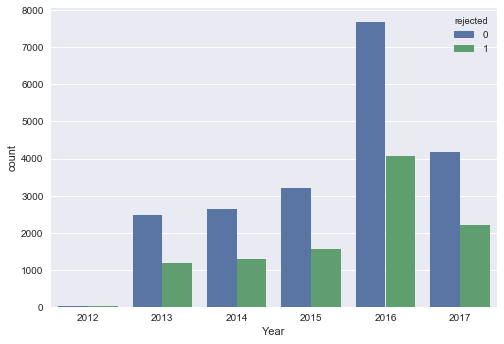

In [590]:
sns.countplot(df[df["Claim status"]=="COMPLETED"]["Year"],hue=df["rejected"])

In [11]:
df[df["Year"]==2016]["Diagnosis code"].value_counts().head(10)

535.40a    1302
455.6a      621
465.9a      589
569.89c     583
537.9c      277
558.9a      270
789.00a     195
786.50a     180
555.1b      163
564.1a      160
Name: Diagnosis code, dtype: int64

In [12]:
df[df["Year"]==2015]["Diagnosis code"].value_counts().head(10)

535.40a    519
455.6a     305
465.9a     228
569.89c    215
558.9a     157
537.9c     155
789.00a    130
531.30a     83
607.1a      61
621.0a      58
Name: Diagnosis code, dtype: int64

In [13]:
df[df["Year"]==2014]["Diagnosis code"].value_counts().head(10)

535.40a    465
455.6a     295
569.89c    229
465.9a     206
558.9a     136
V70.9a      97
569.9a      97
532.30a     70
789.00a     67
537.9c      61
Name: Diagnosis code, dtype: int64

In [593]:
df.groupby("Diagnosis code")["Incurred amount"].mean().sort_values(ascending=False).head(5)

Diagnosis code
213.2a     69587.000000
191.9a     29522.200000
225.0a     25242.085714
733.13a    24454.888889
182.0a     24160.454545
Name: Incurred amount, dtype: float64

In [15]:
df["Claim status"].value_counts()

COMPLETED    30533
REVERSE       3723
NEW            587
PENDING        407
CANCELLED      192
REFERRAL       191
Name: Claim status, dtype: int64

In [16]:
df.sort_values(by="Visit date").tail(1)

,ARN,Received date,Last received date,Visit date,Diagnosis code,CPT code,Claim No,Policy No,Plan code,Benefit level,Claim status,Provider name,Doctor name,Ward level,Incurred amount,Paid amount,Rejected amount,Rejected reason code,Reject remark,Year
35632,QH170002214,2017-05-31 21:03:00.0,2017-05-31 21:03:00.0,2017-05-30 00:00:00.0,465.9a,99201,8BD560,CTM0042708,CN3B,GP consultation,NEW,FOK LAI SING,FOK LAI SING,NaN,160.0,0.0,0.0,NaN,NaN,2017


In [17]:
df[df["Claim status"]=="REVERSE"].head(10)

,ARN,Received date,Last received date,Visit date,Diagnosis code,CPT code,Claim No,Policy No,Plan code,Benefit level,Claim status,Provider name,Doctor name,Ward level,Incurred amount,Paid amount,Rejected amount,Rejected reason code,Reject remark,Year
10,QH130000001,2013-01-04 21:02:00.0,2013-01-04 21:02:00.0,2013-01-02 00:00:00.0,704.8a,RX,DU4P870,CT00205334,CN3B,Medication,REVERSE,AU WAI MING ANGELINA,AU WAI MING ANGELINA,NaN,80.0,0.0,0.0,NaN,NaN,2013
11,QH130000001,2013-01-04 21:02:00.0,2013-01-04 21:02:00.0,2013-01-02 00:00:00.0,704.8a,RX,DU4P870,CT00205334,CN3B,Extra medication,REVERSE,AU WAI MING ANGELINA,AU WAI MING ANGELINA,NaN,124.0,0.0,124.0,39,Policy Exclusion - Personal item,2013
12,QH130000001,2013-01-04 21:02:00.0,2013-01-04 21:02:00.0,2013-01-02 00:00:00.0,704.8a,99203,DU4P870,CT00205334,CN3B,SP consultation,REVERSE,AU WAI MING ANGELINA,AU WAI MING ANGELINA,NaN,350.0,0.0,0.0,NaN,NaN,2013
17,QH120000703,2013-01-07 16:19:00.0,2013-01-07 16:19:00.0,2012-12-27 00:00:00.0,692.9a,99201,C13-00002,CT00205334,CN3B,GP consultation,REVERSE,NON-NETWORK PROVIDER,"DR, TAM SHIU TONG",NaN,100.0,0.0,100.0,64,Exceed benefit limit,2013
18,QH120000703,2013-01-07 16:19:00.0,2013-01-07 16:19:00.0,2012-12-27 00:00:00.0,682.0a,99201,C13-00002,CT00205334,CN3B,GP consultation,REVERSE,NON-NETWORK PROVIDER,"DR, TAM SHIU TONG",NaN,100.0,0.0,100.0,64,Exceed benefit limit,2013
19,QH120000703,2013-01-07 16:19:00.0,2013-01-07 16:19:00.0,2012-12-27 00:00:00.0,692.9a,RX,C13-00002,CT00205334,CN3B,Medication,REVERSE,NON-NETWORK PROVIDER,"DR, TAM SHIU TONG",NaN,300.0,0.0,300.0,64,Exceed benefit limit,2013
20,QH120000703,2013-01-07 16:19:00.0,2013-01-07 16:19:00.0,2012-12-27 00:00:00.0,682.0a,RX,C13-00002,CT00205334,CN3B,Medication,REVERSE,NON-NETWORK PROVIDER,"DR, TAM SHIU TONG",NaN,300.0,0.0,300.0,64,Exceed benefit limit,2013
61,QH120000712,2013-01-09 00:00:00.0,2013-01-09 00:00:00.0,2012-11-29 00:00:00.0,601.9a,SMM,C12-00075C,CTM0012453,CN6B,Supplementary Major Medical Benefit,REVERSE,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,2248.0,0.0,849.6,64,Exceed benefit limit,2013
62,QH120000712,2013-01-09 00:00:00.0,2013-01-09 00:00:00.0,2012-11-29 00:00:00.0,601.9a,0294,C12-00075C,CTM0012453,CN6B,Hospital bill-Misc Expenses,REVERSE,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,806.0,0.0,0.0,NaN,NaN,2013
63,QH120000712,2013-01-09 00:00:00.0,2013-01-09 00:00:00.0,2012-11-29 00:00:00.0,601.9a,52260,C12-00075C,CTM0012453,CN6B,Surgeon's fee,REVERSE,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,5000.0,0.0,0.0,NaN,NaN,2013


In [18]:
df.shape

(35633, 20)

In [19]:
#claim status is cancelled but without reject reason
df[(df["Claim status"]=="CANCELLED") & (df["Rejected reason code"].isnull()==True)].shape

(158, 20)

In [20]:
df["Provider name"].value_counts()

ST. TERESA'S HOSPITAL             8210
HONG KONG BAPTIST HOSPITAL        4861
NON-NETWORK PROVIDER              4741
UNION HOSPITAL                    3310
ST. PAUL'S HOSPITAL               2863
HONG KONG SANATORIUM HOSPITAL     2802
HK ADVENTIST HOST-TSUEN WAN       1195
OTHERS(OVERSEAS)                  1010
CHINESE MEDICINE                   736
EVANGEL HOSPITAL                   576
HK ADVENTIST HOSP-STUBBS ROAD      447
PRECIOUS BLOOD HOSPITAL            415
CANOSSA HOSPITAL                   369
MATILDA & WAR MEMORIA HOSPITAL     122
PRINCE OF WALES HOSPITAL           121
PAMELA YOUDE NETHERSOLE EASTER     113
TAM TAT WAH                         96
GP LOCUM                            89
AU WAI MING ANGELINA                89
QUALITY HEALTHCARE PHYSIOTHERA      76
LAU GAVIN C H                       74
QUEEN ELIZABETH HOSPITAL            67
LAM HO FAI KENNETH                  62
QUEEN MARY HOSPITAL                 61
TSEUNG KWAN O HOSPITAL              59
PRINCESS MARGARET HOSPITA

In [21]:
df[df["Incurred amount"]> 1000.000000].groupby("Provider name")\
["Incurred amount"].mean().sort_values(ascending=False)

Provider name
POK OI HOSPITAL                        28049.090909
CARITAS MEDICAL CENTRE                 25400.000000
NP - CHAN DING NAI                     25000.000000
CHIU KWOK WING SAMUEL                  22530.666667
TONG HOI DIK EDDIE                     19000.000000
QUEEN ELIZABETH HOSPITAL               18677.500000
MATILDA & WAR MEMORIA HOSPITAL         15667.489659
WONG SHUN MAN IRENE                    15262.500000
CHOW LEE SHU NGAR DONNA                12775.000000
QUEEN MARY HOSPITAL                    11085.692308
HK ADVENTIST HOSP-STUBBS ROAD          10460.260532
RUTTONJEE HOSPITAL                     10374.800000
CANOSSA HOSPITAL                       10212.907425
HONG KONG SANATORIUM HOSPITAL          10124.533237
NP - KOO TAK CHING JOHNNY              10000.000000
THE CHINESE UNIVERSITY OF HK           10000.000000
LAI CHI WAI (KA)                        9975.000000
AXON SCANNING CENTRE LTD                8100.000000
SIU SHEUNG YAN PATTY                    8000.00000

In [22]:
df[df["Paid amount"]<> 0.000000].groupby("Provider name")["Paid amount"].mean().sort_values(ascending=False)

Provider name
MATILDA & WAR MEMORIA HOSPITAL    15119.423729
HK ADVENTIST HOSP-STUBBS ROAD     14016.909091
CANOSSA HOSPITAL                   9589.947368
HONG KONG SANATORIUM HOSPITAL      9584.635854
UNION HOSPITAL                     7280.466400
ST. PAUL'S HOSPITAL                7274.029024
HONG KONG BAPTIST HOSPITAL         6810.844601
ST. TERESA'S HOSPITAL              6063.952381
PRECIOUS BLOOD HOSPITAL            4487.358974
EVANGEL HOSPITAL                   3456.534884
HK ADVENTIST HOST-TSUEN WAN        3363.500000
CHAN SHU YU                         365.000000
CHEUNG PAUL M K                     330.000000
WONG BUDDY Y K                      248.166667
SIN CHUNG YAU                       245.000000
WONG DAVID YAT WING                 243.333333
LI YU CHI                           242.750000
CHAN GEORGE                         232.000000
WONG KYIN LIN                       190.000000
CHAK CHARLES N G                    177.500000
LIN CHOR KEUNG                      172.000000

In [24]:
df["rejected"] = df["Rejected reason code"].apply(lambda x: 0 if pd.isnull(x)==True else 1)

In [26]:
df[df["Year"]==2013]["rejected"].value_counts()/len(df[df["Year"]==2013])

0    0.683009
1    0.316991
Name: rejected, dtype: float64

In [139]:
df_clean = df[(df["rejected"]==0)&(df["Claim status"]=="COMPLETED")]

In [140]:
df_filtered1 = df_clean.groupby("Benefit level").filter(lambda x: len(x)>100)

In [141]:
df_filtered2 = df_clean.groupby("Benefit level").filter(lambda x: len(x)<100)

In [142]:
#after removing benefit lower than 100
df_filtered1.shape

(19294, 21)

In [143]:
#benefit lower than 100
df_filtered2.shape

(896, 21)

In [144]:
df_filtered3 = df_filtered1.groupby("Provider name").filter(lambda x: len(x)>50)

In [145]:
df_filtered4 = df_filtered1.groupby("Provider name").filter(lambda x: len(x)<50)

In [146]:
#fter removing both benefit and provider lower than 100
df_filtered3.shape

(17418, 21)

In [147]:
#provider name less than 100
df_filtered4.shape

(1876, 21)

In [148]:
df_filtered5 = df_filtered3.groupby("Diagnosis code").filter(lambda x: len(x)>10)

In [149]:
df_filtered6 = df_filtered3.groupby("Diagnosis code").filter(lambda x: len(x)<10)

In [150]:
#after removing benefit, provider and diagnosis lower than 100
df_filtered5.shape

(15392, 21)

In [151]:
#diagnosis name less than 100
df_filtered6.shape

(1826, 21)

In [152]:
filtered = df_filtered5.copy(deep=True)

In [483]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [416]:
def regressionScore(model, name, myX,myy):
    s = cross_val_score(model, myX, myy, cv=5, scoring="r2")
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

In [417]:
def fitAndPrint1(model,X,y):
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    ## The line / model
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

    print "Score:", model.score(X_test, y_test)

In [418]:
random_state = np.random.RandomState(0)

In [419]:
filtered["Benefit level"] = LabelEncoder().fit_transform(filtered["Benefit level"].values)
filtered["Provider name"] = LabelEncoder().fit_transform(filtered["Provider name"].values)
filtered["Diagnosis code"] = LabelEncoder().fit_transform(filtered["Diagnosis code"].values)
filtered["Plan code"] = LabelEncoder().fit_transform(filtered["Plan code"].values)
filtered["CPT code"] = LabelEncoder().fit_transform(filtered["CPT code"].values)

In [420]:
xlist = ["Benefit level","Diagnosis code","Provider name","Year","Plan code","CPT code"]

In [421]:
X = filtered[xlist]
y = filtered["Incurred amount"]

In [422]:
lm = LinearRegression()
regressionScore(lm,"Linear Regression",X,y)

Linear Regression Score:	0.068 ± 0.012


In [423]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [424]:
regressionScore(rf,"Random Forest",X,y)

Random Forest Score:	0.287 ± 0.072


In [425]:
ridge = RidgeCV()

In [426]:
regressionScore(ridge,"Ridge",X,y)

Ridge Score:	0.068 ± 0.012


Score: 0.435475956769


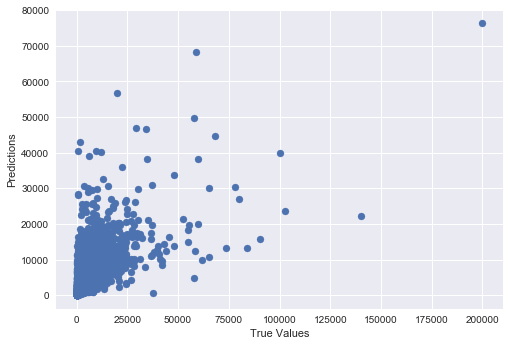

In [427]:
fitAndPrint1(rf,X,y)

In [428]:
for x,y in zip(rf.feature_importances_, xlist):
    print x,y

0.0120005098023 Benefit level
0.28184885092 Diagnosis code
0.0970112907253 Provider name
0.0639862697816 Year
0.129685872532 Plan code
0.41546720624 CPT code


In [429]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [430]:
xlist = ["Diagnosis code","Plan code","CPT code"]

In [431]:
X = filtered[xlist]
y = filtered["Incurred amount"]

In [432]:
rf = RandomForestRegressor(n_estimators=1000,n_jobs=-1)

In [433]:
regressionScore(rf,"Random Forest",X,y)

Random Forest Score:	0.278 ± 0.093


In [434]:
gb = GradientBoostingRegressor()
regressionScore(gb,"Gradient Boosting Regressor",X,y)

Gradient Boosting Regressor Score:	0.339 ± 0.029


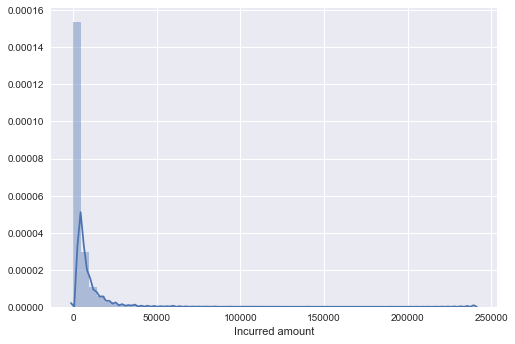

In [435]:
sns.distplot(df["Incurred amount"])

In [436]:
df_sorted = df_clean[df["Incurred amount"]>1].sort_values(by="Incurred amount").copy()

/Users/Sheena/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [437]:
df_slice = df_sorted[int(np.ceil(len(df_sorted)*.1)):int(np.ceil(len(df_sorted)*.9))].copy()

In [438]:
df_slice["Benefit level"] = LabelEncoder().fit_transform(df_slice["Benefit level"].values)
df_slice["Provider name"] = LabelEncoder().fit_transform(df_slice["Provider name"].values)
df_slice["Diagnosis code"] = LabelEncoder().fit_transform(df_slice["Diagnosis code"].values)
df_slice["Plan code"] = LabelEncoder().fit_transform(df_slice["Plan code"].values)
df_slice["CPT code"] = LabelEncoder().fit_transform(df_slice["CPT code"].values)

In [439]:
X = df_slice[xlist]
y = df_slice["Incurred amount"]

In [440]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
regressionScore(rf,"Random Forest",X,y)

Random Forest Score:	-68.7 ± 68.7


Score: 0.524052102256


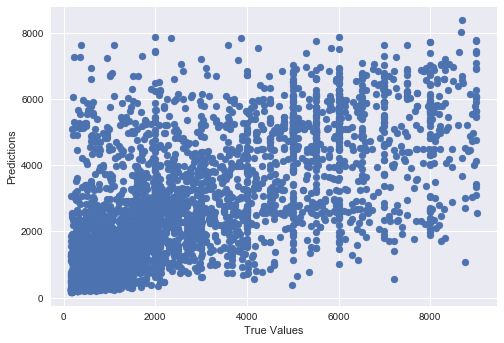

In [441]:
fitAndPrint1(rf,X,y)

In [406]:
df_slice.shape

(16149, 21)

In [407]:
for x,y in zip(rf.feature_importances_, xlist):
    print x,y

0.253129404316 Diagnosis code
0.11612979845 Plan code
0.630740797234 CPT code


In [411]:
filtered_xlist = ["Plan code","Diagnosis code","Provider name","CPT code"]

In [412]:
X = df_slice[filtered_xlist]
y = df_slice["Incurred amount"]

In [413]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
regressionScore(rf,"Random Forest",X,y)

Random Forest Score:	-65.8 ± 63.9


Score: 0.580066675979


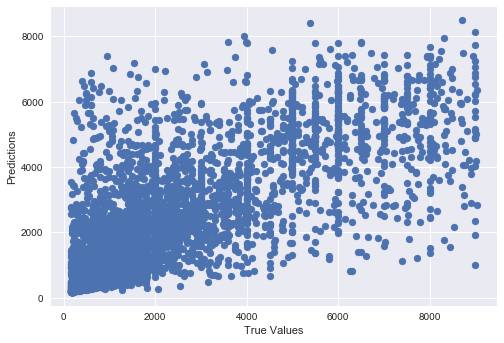

In [414]:
fitAndPrint1(rf,X,y)

In [443]:
df_slice.describe()

,Diagnosis code,CPT code,Plan code,Benefit level,Provider name,Incurred amount,Paid amount,Rejected amount,Year,rejected
count,16149.000000,16149.000000,16149.000000,16149.000000,16149.000000,16149.000000,16149.000000,16149.000000,16149.000000,16149.0
mean,394.079571,99.186203,10.335810,39.327884,199.122299,2180.980158,326.416983,0.851590,2015.446034,0.0
std,182.362407,84.162758,6.779188,19.743454,96.436859,2164.649571,1231.081168,27.543958,1.268026,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.000000,0.000000,0.000000,2013.000000,0.0
25%,292.000000,7.000000,5.000000,27.000000,88.000000,551.000000,0.000000,0.000000,2015.000000,0.0
50%,369.000000,112.000000,9.000000,39.000000,180.000000,1400.000000,0.000000,0.000000,2016.000000,0.0
75%,506.000000,180.000000,13.000000,45.000000,290.000000,3065.000000,0.000000,0.000000,2016.000000,0.0
max,790.000000,203.000000,31.000000,81.000000,347.000000,9032.000000,9015.000000,3210.000000,2017.000000,0.0


In [451]:
#25% 158 
#50% 1400
#75% 3065

def amountClass(x):
    if x < 551:
        return 0
    elif (x>=551) & (x<1400):
        return 1
    elif (x>=1400) & (x< 3065):
        return 2
    else:
        return 3

In [452]:
df_slice["amountClass"] = df_slice["Incurred amount"].apply(amountClass)

In [453]:
df_slice["amountClass"].value_counts()

3    4041
0    4037
1    4036
2    4035
Name: amountClass, dtype: int64

In [469]:
xlist = ["Benefit level","Diagnosis code","Provider name","Plan code","CPT code"]

In [470]:
X = df_slice[xlist]
y = df_slice["amountClass"]

In [471]:
rf = RandomForestClassifier()

In [472]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
    
print confusion_matrix(y_test,predictions)

[[948 185  70  25]
 [219 668 186  84]
 [ 71 235 727 218]
 [ 28  64 245 872]]


In [473]:
s = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print "{} Score:\t{:0.3} ± {:0.3}".format("RF classifier", s.mean().round(3), s.std().round(3))

RF classifier Score:	0.56 ± 0.041


In [474]:
for x,y in zip(rf.feature_importances_, xlist):
    print x,y

0.156788636651 Benefit level
0.355547559041 Diagnosis code
0.15435617792 Provider name
0.130172555221 Plan code
0.203135071167 CPT code


In [486]:
knn = KNeighborsClassifier()

X = df_slice[xlist]
y = df_slice["amountClass"]

In [487]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
    
print confusion_matrix(y_test,predictions)

[[892 234  67  57]
 [240 667 207  88]
 [ 95 261 685 168]
 [ 48 134 315 687]]


In [488]:
s = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
print "{} Score:\t{:0.3} ± {:0.3}".format("KNN classifier", s.mean().round(3), s.std().round(3))

KNN classifier Score:	0.531 ± 0.044


In [489]:
gb = GradientBoostingClassifier()
s = cross_val_score(gb, X, y, cv=5, scoring="accuracy")
print "{} Score:\t{:0.3} ± {:0.3}".format("GB classifier", s.mean().round(3), s.std().round(3))

GB classifier Score:	0.599 ± 0.051


In [491]:
X = df_slice[xlist]
y = df_slice["amountClass"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
    
print confusion_matrix(y_test,predictions)

[[826 211  90  65]
 [243 639 217  98]
 [ 82 288 644 179]
 [ 66 167 326 704]]


In [561]:
df[df["Rejected reason code"].isnull()==False]["Provider name"].value_counts().head(6)

ST. TERESA'S HOSPITAL             2759
NON-NETWORK PROVIDER              1806
HONG KONG BAPTIST HOSPITAL        1788
HONG KONG SANATORIUM HOSPITAL     1140
ST. PAUL'S HOSPITAL               1074
UNION HOSPITAL                     955
Name: Provider name, dtype: int64

In [510]:
df.groupby(["Rejected reason code","Provider name"])["Provider name"].count().sort_values(ascending = False)

Rejected reason code  Provider name                 
64                    ST. TERESA'S HOSPITAL             1111
                      NON-NETWORK PROVIDER               930
                      HONG KONG BAPTIST HOSPITAL         719
68                    ST. TERESA'S HOSPITAL              674
71                    ST. TERESA'S HOSPITAL              562
68                    HONG KONG BAPTIST HOSPITAL         514
64                    UNION HOSPITAL                     492
                      ST. PAUL'S HOSPITAL                429
71                    HONG KONG BAPTIST HOSPITAL         384
                      HONG KONG SANATORIUM HOSPITAL      353
64                    HONG KONG SANATORIUM HOSPITAL      312
68                    HONG KONG SANATORIUM HOSPITAL      299
64                    CHINESE MEDICINE                   294
71                    ST. PAUL'S HOSPITAL                230
1                     NON-NETWORK PROVIDER               221
68                    ST. PAUL'S

In [513]:
df.groupby("Year")["Rejected reason code"].count()

Year
2012      10
2013    1416
2014    1436
2015    1742
2016    4725
2017    2466
Name: Rejected reason code, dtype: int64

In [522]:
years = df["Year"].value_counts().index
counts = df.groupby("Year")["Rejected reason code"].count()

In [531]:
for x,y in zip(years.sort_values(ascending=True),counts):
    print float(y)/float(df[df["Year"]==x].shape[0])

0.333333333333
0.316991269308
0.321828776333
0.31575131412
0.346483830755
0.327925531915


In [572]:
prov = df[df["Rejected reason code"].isnull()==False]["Provider name"].value_counts().head(5).index
top_rr = df["Rejected reason code"].value_counts().head(5).index

In [573]:
df_prov = df[(df["Provider name"].isin(prov)) & (df["Rejected reason code"].isin(top_rr))]

In [578]:
df_prov[df_prov["Rejected reason code"]==top_rr[4]].groupby(["Rejected reason code","Provider name"])["Provider name"].\
count().sort_values(ascending=False)

Rejected reason code  Provider name                 
22                    ST. TERESA'S HOSPITAL             96
                      NON-NETWORK PROVIDER              77
                      HONG KONG SANATORIUM HOSPITAL     69
                      ST. PAUL'S HOSPITAL               45
                      HONG KONG BAPTIST HOSPITAL        13
Name: Provider name, dtype: int64

In [605]:
df_rr = df[df["Rejected reason code"]=="22"]

In [606]:
df_rr

,ARN,Received date,Last received date,Visit date,Diagnosis code,CPT code,Claim No,Policy No,Plan code,Benefit level,...,Provider name,Doctor name,Ward level,Incurred amount,Paid amount,Rejected amount,Rejected reason code,Reject remark,Year,rejected
350,QH120000759,2013-02-14 16:51:00.0,2013-02-14 16:51:00.0,2012-11-10 00:00:00.0,719.46a,99203,C13-00036,CTM0016403,CN4B,SP consultation,...,QUEEN MARY HOSPITAL,QUEEN MARY HOSPITAL,NaN,1000.00,0.0,1000.00,22,Pre-existing condition,2013,1
961,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,455.6a,45378,C13-00092,CTA9002144,CN4A,Surgeon's fee,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,900.00,0.0,900.00,22,Pre-existing condition,2013,1
962,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,555.1b,45378,C13-00092,CTA9002144,CN4A,Surgeon's fee,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,900.00,0.0,900.00,22,Pre-existing condition,2013,1
971,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,455.6a,0130,C13-00092,CTA9002144,CN4A,Hospital bill-room & board,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,680.00,0.0,680.00,22,Pre-existing condition,2013,1
972,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,555.1b,0130,C13-00092,CTA9002144,CN4A,Hospital bill-room & board,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,680.00,0.0,680.00,22,Pre-existing condition,2013,1
973,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,455.6a,0130,C13-00092,CTA9002144,CN4A,Hospital bill-room & board,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,43.00,0.0,43.00,22,Pre-existing condition,2013,1
974,QH120000769,2013-04-18 00:00:00.0,2013-04-18 00:00:00.0,2012-06-12 00:00:00.0,555.1b,0130,C13-00092,CTA9002144,CN4A,Hospital bill-room & board,...,HONG KONG BAPTIST HOSPITAL,HONG KONG BAPTIST HOSPITAL,General,43.00,0.0,43.00,22,Pre-existing condition,2013,1
1283,QH130000303,2013-05-24 00:00:00.0,2013-05-24 00:00:00.0,2013-05-05 00:00:00.0,535.40a,0130,C13-00169,CTM0018371,CN3B,Hospital bill-room & board,...,EVANGEL HOSPITAL,EVANGEL HOSPITAL,General,718.75,0.0,718.75,22,Pre-existing condition,2013,1
1284,QH130000303,2013-05-24 00:00:00.0,2013-05-24 00:00:00.0,2013-05-05 00:00:00.0,574.00b,0130,C13-00169,CTM0018371,CN3B,Hospital bill-room & board,...,EVANGEL HOSPITAL,EVANGEL HOSPITAL,General,718.75,0.0,718.75,22,Pre-existing condition,2013,1
1285,QH130000303,2013-05-24 00:00:00.0,2013-05-24 00:00:00.0,2013-05-05 00:00:00.0,535.40a,0130,C13-00169,CTM0018371,CN3B,Hospital bill-room & board,...,EVANGEL HOSPITAL,EVANGEL HOSPITAL,General,718.75,0.0,718.75,22,Pre-existing condition,2013,1
